In [1]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)


2022-02-18 14:51:47.140685: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
#Load the pretrained Network
#vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height,img_width,3), pooling=None, classes=1000)

vgg16_model=tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                             weights='imagenet')
print("pretrained Network is loaded")

2022-02-18 14:51:54.247106: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-18 14:51:54.248368: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-18 14:51:54.351348: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-18 14:51:54.351415: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-18 14:51:54.355376: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-18 14:51:54.355503: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

pretrained Network is loaded


In [3]:
# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False
print("Pretrained layers are freezed")

Pretrained layers are freezed


In [4]:
from tensorflow.keras.models import Sequential
model=Sequential()

In [5]:
model.add(vgg16_model)

model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
hidden_layer=model.add(Dense(128, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(64, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(1, activation='sigmoid', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


https://www.kaggle.com/blurredmachine/alexnet-architecture-a-complete-guide

In [6]:
# Input parameter
#train_data_dir ='/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir'
train_data_dir='/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/train_dir/'
val_data_dir ='/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/val_dir/'
model_weights_file = '/home/poornima/Data/GDPS/model_vgg16_weights.hdf5'
nb_epochs = 50
print("Input parameters are assigned")

Input parameters are assigned


In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [8]:
# image data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False,class_mode='binary')

Found 18016 images belonging to 2 classes.
Found 3584 images belonging to 2 classes.


In [9]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = "/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/VGG16_sgd_custome_model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [10]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(train_generator, epochs=nb_epochs, validation_data=validation_generator, callbacks=[checkpoint,early])

print('Training Completed!')

2022-02-18 14:53:52.465271: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-18 14:53:52.467281: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/50


2022-02-18 14:53:53.016774: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-18 14:53:53.250661: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-18 14:53:54.325027: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-18 14:53:54.411109: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1126/1126 [==============================] - 228s 191ms/step - loss: 0.7166 - accuracy: 0.5386 - val_loss: 0.6813 - val_accuracy: 0.5578

Epoch 00001: val_accuracy improved from -inf to 0.55776, saving model to /home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/VGG16_sgd_custome_model-01-0.56.h5
Epoch 2/50
1126/1126 [==============================] - 214s 190ms/step - loss: 0.6840 - accuracy: 0.5712 - val_loss: 0.6929 - val_accuracy: 0.4671

Epoch 00002: val_accuracy did not improve from 0.55776
Epoch 3/50
1126/1126 [==============================] - 212s 189ms/step - loss: 0.6878 - accuracy: 0.5436 - val_loss: 0.6740 - val_accuracy: 0.5773

Epoch 00003: val_accuracy improved from 0.55776 to 0.57729, saving model to /home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/VGG16_sgd_custome_model-03-0.58.h5
Epoch 4/50
1126/1126 [==============================] - 213s 189ms/step - loss: 0.6776 - accuracy: 0.5653 - val_loss: 0.6686 - val_accuracy: 0.6169

Epoch 0


Epoch 00035: val_accuracy did not improve from 0.66155
Epoch 36/50
1126/1126 [==============================] - 213s 189ms/step - loss: 0.6252 - accuracy: 0.6534 - val_loss: 0.6220 - val_accuracy: 0.6191

Epoch 00036: val_accuracy did not improve from 0.66155
Epoch 37/50
1126/1126 [==============================] - 214s 190ms/step - loss: 0.6290 - accuracy: 0.6380 - val_loss: 0.6244 - val_accuracy: 0.6292

Epoch 00037: val_accuracy did not improve from 0.66155
Epoch 38/50
1126/1126 [==============================] - 213s 189ms/step - loss: 0.6353 - accuracy: 0.6272 - val_loss: 0.6513 - val_accuracy: 0.6077

Epoch 00038: val_accuracy did not improve from 0.66155
Epoch 39/50
1126/1126 [==============================] - 213s 189ms/step - loss: 0.6400 - accuracy: 0.6265 - val_loss: 0.6102 - val_accuracy: 0.6641

Epoch 00039: val_accuracy improved from 0.66155 to 0.66406, saving model to /home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/VGG16_sgd_custome_model-39-0.66.h5
E

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


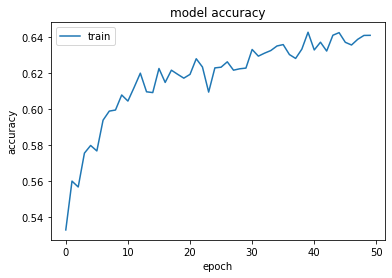

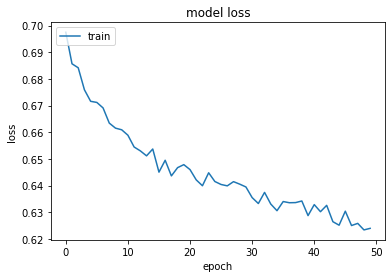

In [11]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
 # save model and architecture to single file
model.save('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/novel_model_sgd__verification_Custom.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128    
_________________________________________________________________
classification_layer (Dense) (None, 64)                8

In [13]:
# save weights to single file
model.save_weights('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/novel_model_sgd_verification_weights_custom.h5')
print("Weights saved in local  Drive")

Weights saved in local  Drive


In [14]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/novel_model_sgd__verification_Custom.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128    
_________________________________________________________________
classification_layer (Dense) (None, 64) 

In [15]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [16]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [17]:
# Saving intermediate model
intermediate_layer_model.save('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/intermediate_model_sgd_Custom.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128

In [18]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/intermediate_model_sgd_Custom.h5')
print("Intermediate model is loaded")

Intermediate model is loaded


In [19]:
# Training Label feature identification(y_train)

batch_size=16
sample_count=18016
features = np.zeros(shape=(18016, 64))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(18016))
i = 0
for inputs_batch, labels_batch in train_generator:
   features_batch = model.predict(inputs_batch)
   features[i * batch_size: (i + 1) * batch_size] = features_batch
   labels[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels.shape)

(18016,)


In [20]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=np.expand_dims(labels, axis=1)
print(labels_train.shape)
print(labels_train)
print(features_train)

(18016, 64)
(18016, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.         0.09068078 0.         ... 0.         0.         0.        ]
 [0.         0.08481286 0.00313908 ... 0.         0.         0.        ]
 [0.         0.03853151 0.         ... 0.         0.         0.02188022]
 ...
 [0.         0.         0.         ... 0.04079187 0.09497833 0.04101268]
 [0.         0.         0.         ... 0.         0.00851696 0.04327816]
 [0.         0.         0.         ... 0.05231458 0.12369076 0.07769489]]


In [21]:
# identification of test labels
import numpy as np
batch_size=16
sample_count=3584
features_test = np.zeros(shape=(3584, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(3584))
i = 0
for inputs_batch, labels_batch in validation_generator:
   features_batch = model.predict(inputs_batch)
   features_test[i * batch_size: (i + 1) * batch_size] = features_batch
   labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(3584,)
(3584, 64)
[0. 0. 0. ... 1. 1. 1.]


In [22]:
# #identification of testing Labels
print(features_test.shape)
labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(3584, 64)
(3584, 1)
[[0.         0.28041112 0.16946882 ... 0.         0.         0.        ]
 [0.         1.59075809 1.29880369 ... 0.         0.         0.        ]
 [0.         0.80137199 0.68089193 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.06891005 0.07418514 0.07168388]
 [0.         0.         0.         ... 0.         0.03152489 0.06897026]
 [0.         0.         0.         ... 0.05264101 0.15748958 0.08094272]]


In [23]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1404  595]
 [ 552 1033]]
Accuracy: 67.997
Precision: 63.452
Recall: 65.174
F-Measure: 64.301


In [24]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1478  521]
 [ 615  970]]
Accuracy: 68.304
Precision: 65.057
Recall: 61.199
F-Measure: 63.069


In [25]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1584  415]
 [ 794  791]]
Accuracy: 66.267
Precision: 65.589
Recall: 49.905
F-Measure: 56.682


In [26]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1584  415]
 [ 794  791]]
Accuracy: 66.267
Precision: 65.589
Recall: 49.905
F-Measure: 56.682


In [27]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[ 885 1114]
 [ 219 1366]]
Accuracy: 62.807
Precision: 55.081
Recall: 86.183
F-Measure: 67.208


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1415  584]
 [ 720  865]]
Accuracy: 63.616
Precision: 59.696
Recall: 54.574
F-Measure: 57.020


In [29]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1494  505]
 [ 599  986]]
Accuracy: 69.196
Precision: 66.130
Recall: 62.208
F-Measure: 64.109


/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/model_vgg16_GDPS.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know category of Image",  )
output = widgets.Output()

model = load_model('/content/drive/My Drive/Colab Notebooks/Signature Verification vgg16 model GDPS/model_vgg16_GDPS.h5')
img_path = '/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir/forged/cf-001-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
if(block4_pool_features> 0.5):
  a= 'Genuine'
elif(block4_pool_features< 0.5):
  a='forged'
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Image is  "  + a)

button.on_click(on_button_clicked)
display(button, output)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Button clicked.")

button.on_click(on_button_clicked)
display(button, output)